# Pandas - A Very Brief Introduction to Data Exploration


In a machine learning (ML) project, we often get data from CSV/TSV files. Pandas is a convenient tool to load data, process & analyze it before using the data for training an ML model.

Pandas is a fast, powerful, flexible, and easy-to-use open-source data analysis and manipulation tool. Pandas stands for **Python Data Analysis Library**. It is built on top of the Python programming language.  

Using pandas we can load data from CSV/TSV files. It converts the data into a Python object called DataFrame. The object has rows and columns representing the samples and features, respectively.

To train an ML model, we must convert the pandas DataFrame object into arrays (NumPy array): data matrix and one-dimensional target array. But before we do that, we need to do some data processing and exploration.

In this notebook, we load a small dataset stored in a CSV file as a pandas DataFrame object. Then, we perform basic data exploration.

- Get information on the features (columns)
- Check	categorical features
- One-hot encode categorical features
- Check NaN values
- Data cleaning (remove/replace missing values)
- Compute feature correlation with the target
- Visualize feature correlation
- Select a subset of columns
- Convert data frame objects into arrays

See the following link to learn about pandas methods:
https://pandas.pydata.org/


## Load a CSV File as a Pandas DataFrame Object

We use pandas "read_csv" method to load the CSV file as a DataFrame object. In most cases, we only need to pass the file path as the first argument.

Another argument is "header", which could be useful in some cases. By default, header=0. In this case, the read_csv method infers the column names from the first line of the file. Alternatively, column names can be passed explicitly, then the behavior is identical to header=None. 

For a full list of the arguments of the read_csv method see:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [1]:
import pandas as pd

# df = pd.DataFrame({'Bedrooms': [None, 3, 1, 0, 3, 2, 2, 0], 
#                    'Backyard': ['Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No'],
#                    'Number of Schools': [0, 0, 3, 0, 3, 3, 0, 1],
#                    'Price' : [150, 250, 100, None, 220, 135, 140, 0]
#                   })


df = pd.read_csv('/Users/mhasan2/Library/CloudStorage/OneDrive-UniversityofNebraska-Lincoln/Datasets/DataScienceRepository/Housing_small.csv', header=0)
df

/var/folders/zd/2ty0m0yn1jzc2zjgq1154kkxxmbbr2/T/ipykernel_99724/2806221057.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Bedrooms,Backyard,Nearby Schools,Price
0,NaN,Yes,0,150.0
1,3.0,Yes,0,250.0
2,1.0,No,3,100.0
3,0.0,No,0,NaN
4,3.0,Yes,3,220.0
5,2.0,Yes,3,135.0
6,2.0,Yes,0,140.0
7,0.0,No,1,0.0


## Get Information on the Pandas Data Frame Object

There are two types of columns. Columns with:
- Numeric features
- Categorical features (data type is an object)

Use pandas info method to print information about a DataFrame including the index dtype and columns, non-null values, and memory usage.

In [2]:
print("Dimension of the data: ", df.shape)

print(df.info())

Dimension of the data:  (8, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bedrooms        7 non-null      float64
 1   Backyard        8 non-null      object 
 2   Nearby Schools  8 non-null      int64  
 3   Price           7 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 388.0+ bytes
None


## One-Hot Encode the Categorical Feature Columns 

From the above, we see that the "Backyard" column is non-numeric (its data type is "object"). We can convert a categorical variable into a dummy/indicator variable using the get_dummies method. Each variable is converted into as many 0/1 variables (one-hot encoded).

First, we select all categorical columns. Then, we do the one-hot encoding. Finally, we will drop the categorical columns from the DataFrame object and combine the one-hot encoded columns with the numeric columns.

In [3]:
print("Original DataFrame:")
print(df)

# Step 1: Separate object columns
category_df = df.select_dtypes('object')


'''
Step 2: One-hot encode the object columns. 
After using get_dummies, typecast the variable into an integer.
'''
dummy_df = pd.get_dummies(category_df).astype(int)

'''
When dealing with columns that have multiple categories, one-hot encoding creates a separate binary column for each category. 
For example, a column 'color' with values like "red," "blue," and "green" would result in three columns: color_red, color_blue, 
and color_green. 
To avoid redundancy, only n-1 columns are needed for n categories, as the last column can be inferred from the others. 
Using drop_first=True in pd.get_dummies drops the first category and reduces redundancy, 
making the remaining columns sufficient to represent all categories.
'''
dummy_nonredundant_df = pd.get_dummies(category_df, drop_first=True).astype(int)

# Step 3: Drop the original object columns from the original DataFrame
df_non_object = df.drop(columns=category_df.columns)

# Step 4: Combine the one-hot encoded columns with the non-object columns
df = pd.concat([df_non_object, dummy_nonredundant_df], axis=1)


print("\nOne-Hot Encoded DataFrame:")
print(dummy_df)
print("\nOne-Hot Encoded Nonredundant DataFrame:")
print(dummy_nonredundant_df)
print("\nFinal DataFrame with Nonredundant One-Hot Encoded Columns:")
print(df)

Original DataFrame:
   Bedrooms Backyard  Nearby Schools  Price
0       NaN      Yes               0  150.0
1       3.0      Yes               0  250.0
2       1.0       No               3  100.0
3       0.0       No               0    NaN
4       3.0      Yes               3  220.0
5       2.0      Yes               3  135.0
6       2.0      Yes               0  140.0
7       0.0       No               1    0.0

One-Hot Encoded DataFrame:
   Backyard_No  Backyard_Yes
0            0             1
1            0             1
2            1             0
3            1             0
4            0             1
5            0             1
6            0             1
7            1             0

One-Hot Encoded Nonredundant DataFrame:
   Backyard_Yes
0             1
1             1
2             0
3             0
4             1
5             1
6             1
7             0

Final DataFrame with Nonredundant One-Hot Encoded Columns:
   Bedrooms  Nearby Schools  Price  Backyard_Yes
0

## Check Whether the Data Frame Cell Values are Null or Not-Null

To detect NaN (not a number) values, use either the isna or isnull methods.

It will display True/False for **all cells** in the data frame.

In [4]:
df.isna()

,Bedrooms,Nearby Schools,Price,Backyard_Yes
0,True,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,True,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False


## Check if there are any null values in any column

The above technique to detect NaN values is inefficient for large files. We may use the following technique instead.

In [5]:
#df.isnull().values.any()
df.isna().values.any()

True

# Identify the columns with null values

In [6]:
null_columns = df.columns[df.isna().any()].tolist()
print(null_columns)

['Bedrooms', 'Price']


## Check if there are any null values in a specifc column

In [7]:
df['Price'].isnull()

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7    False
Name: Price, dtype: bool

## Count the null values in a specifc column

In [8]:
df['Price'].isnull().sum()

1

## Data Cleaning

We need to clean the missing features, otherwise the ML algorithms won’t work. By "missing" we simply mean NA ("not available") or "not present for whatever reason". Many data sets simply arrive with missing data, either because it exists and was not collected or it never existed. 

- The NaN is the default missing value marker.

There are at least three techniques to clean data:


- Replace Missing Feature Values
- Drop "NA" Missing Feature Values
- Drop "Non-NA" Missing Feature Values




## Replace Missing Feature Values

We can replace an empty cell using DataFrame’s fillna() method.

The fillna() method can "fill in" NA (Not Available) or missing values with non-NA data in a couple of ways.

For example, we can fill in the empty cells with 0 values: df["Bedrooms"] = df["Bedrooms"].fillna(0)

Or, we can fill in the empty cells with median values, as shown below.


In [9]:
print("DataFrame (Original)")
print(df)

median_Bedrooms = df["Bedrooms"].median() 

print("\n\nMedian value for Bedrooms: ", median_Bedrooms)

df["Bedrooms"] = df["Bedrooms"].fillna(median_Bedrooms)

print("\n\nDataFrame (after replacing the NaN value in the Bedrooms column )")
print(df)

DataFrame (Original)
   Bedrooms  Nearby Schools  Price  Backyard_Yes
0       NaN               0  150.0             1
1       3.0               0  250.0             1
2       1.0               3  100.0             0
3       0.0               0    NaN             0
4       3.0               3  220.0             1
5       2.0               3  135.0             1
6       2.0               0  140.0             1
7       0.0               1    0.0             0


Median value for Bedrooms:  2.0


DataFrame (after replacing the NaN value in the Bedrooms column )
   Bedrooms  Nearby Schools  Price  Backyard_Yes
0       2.0               0  150.0             1
1       3.0               0  250.0             1
2       1.0               3  100.0             0
3       0.0               0    NaN             0
4       3.0               3  220.0             1
5       2.0               3  135.0             1
6       2.0               0  140.0             1
7       0.0               1    0.0          

## Drop "NA" Missing Feature Values

 If the label of a sample is missing, we can drop that sample using the DataFrame's dropna() method.

- To drop the rows with missing values, set the "axis" attribute to the value 0

Additionally, we can drop the columns with missing values, set the "axis" attribute to the value 1


In [10]:
# Make a deep copy of the DataFrame object
df_copy = df.copy()

# Remove the rows with missing values 
df_copy = df_copy.dropna(axis=0)


print("DataFrame (Original)")
print(df)

print("\n\nDataFrame (after removing the rows with missing values)")
print(df_copy)

DataFrame (Original)
   Bedrooms  Nearby Schools  Price  Backyard_Yes
0       2.0               0  150.0             1
1       3.0               0  250.0             1
2       1.0               3  100.0             0
3       0.0               0    NaN             0
4       3.0               3  220.0             1
5       2.0               3  135.0             1
6       2.0               0  140.0             1
7       0.0               1    0.0             0


DataFrame (after removing the rows with missing values)
   Bedrooms  Nearby Schools  Price  Backyard_Yes
0       2.0               0  150.0             1
1       3.0               0  250.0             1
2       1.0               3  100.0             0
4       3.0               3  220.0             1
5       2.0               3  135.0             1
6       2.0               0  140.0             1
7       0.0               1    0.0             0


### Specify a column to remove rows if that column has NaN values

Use the subset parameter in the dropna method to achieve this.

In [11]:
# Make a deep copy of the DataFrame object
df_copy_1 = df.copy()

df_copy_1 = df_copy_1.dropna(subset=['Price'])


print("DataFrame (Original)")
print(df)

print("\n\nDataFrame (after removing the rows with missing values)")
print(df_copy_1)

DataFrame (Original)
   Bedrooms  Nearby Schools  Price  Backyard_Yes
0       2.0               0  150.0             1
1       3.0               0  250.0             1
2       1.0               3  100.0             0
3       0.0               0    NaN             0
4       3.0               3  220.0             1
5       2.0               3  135.0             1
6       2.0               0  140.0             1
7       0.0               1    0.0             0


DataFrame (after removing the rows with missing values)
   Bedrooms  Nearby Schools  Price  Backyard_Yes
0       2.0               0  150.0             1
1       3.0               0  250.0             1
2       1.0               3  100.0             0
4       3.0               3  220.0             1
5       2.0               3  135.0             1
6       2.0               0  140.0             1
7       0.0               1    0.0             0


## Non-contiguous Indexing

After removing some rows, the indexing will become non-contiguous. To create contiguous indexing, use the following method:
- reset_index(inplace=True, drop=True) 

In [12]:
df_copy.reset_index(inplace=True, drop=True) 
df_copy

,Bedrooms,Nearby Schools,Price,Backyard_Yes
0,2.0,0,150.0,1
1,3.0,0,250.0,1
2,1.0,3,100.0,0
3,3.0,3,220.0,1
4,2.0,3,135.0,1
5,2.0,0,140.0,1
6,0.0,1,0.0,0


### For the next task, we will use the original DataFrame object named "df".

In [13]:
df

,Bedrooms,Nearby Schools,Price,Backyard_Yes
0,2.0,0,150.0,1
1,3.0,0,250.0,1
2,1.0,3,100.0,0
3,0.0,0,NaN,0
4,3.0,3,220.0,1
5,2.0,3,135.0,1
6,2.0,0,140.0,1
7,0.0,1,0.0,0


## Drop the "Non-NA" Missing Feature Values

Sometimes we consider some values (other than NA) as "missing" values.

For this demo, the value "0" in the target column ("Price") could be considered as a missing value. 




## Check Whether Each element in the DataFrame Contains Specific Values (e.g., 0)

Use the isin(values) method to check whether the cells contain the "values", such as 0.

In [14]:
df.isin([0])

,Bedrooms,Nearby Schools,Price,Backyard_Yes
0,False,True,False,False
1,False,True,False,False
2,False,False,False,True
3,True,True,False,True
4,False,False,False,False
5,False,False,False,False
6,False,True,False,False
7,True,False,True,True


## Drop the Rows Where the 'Price' Column Has Zero Values

In [15]:
df = df[~df['Price'].isin([0])]
df

,Bedrooms,Nearby Schools,Price,Backyard_Yes
0,2.0,0,150.0,1
1,3.0,0,250.0,1
2,1.0,3,100.0,0
3,0.0,0,NaN,0
4,3.0,3,220.0,1
5,2.0,3,135.0,1
6,2.0,0,140.0,1


## Numerical Correlations with the Target Column

Since the dataset is not too large, we can easily compute the standard correlation coefficient (also called Pearson’s r) between the target and all features using DataFrame's corr() method.

In [16]:
# Set display options to show more rows
pd.set_option('display.max_rows', None)

df_copy.corr()['Price'].sort_values(ascending=False)

Price             1.000000
Bedrooms          0.980431
Backyard_Yes      0.772926
Nearby Schools   -0.076385
Name: Price, dtype: float64

## Visualize the Numerical Correlation

We create a pair plot to visualize the relationships of the features. For this, we use the seaborn pairplot function.

A pairplot provides pairwise relationships of the features in a dataset. The pairplot function creates a grid of Axes such that each variable in data will be shared on the y-axis across a single row and on the x-axis across a single column. 

We also show the Pearson correlation coefficient (Pearson's r) between pairs of features as well as the density plot.

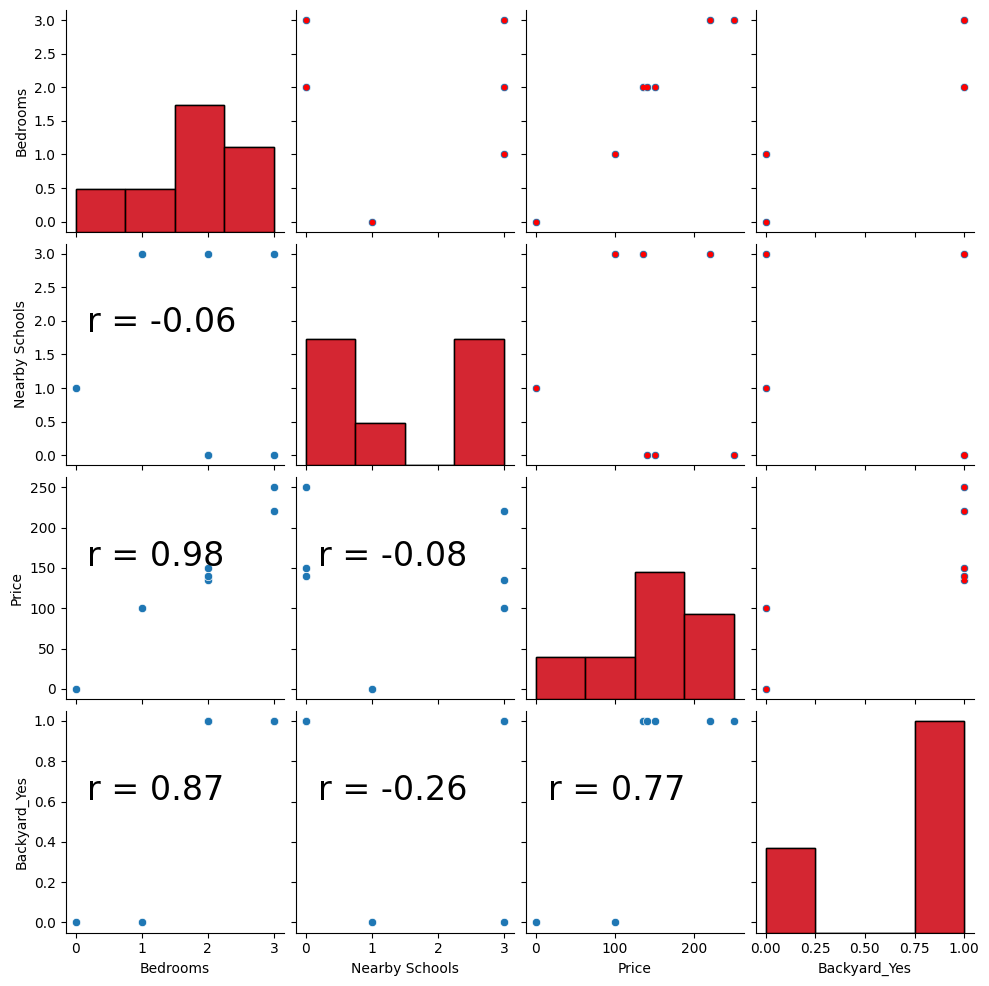

In [17]:
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair plot
g = sns.pairplot(df_copy)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
#g.map_diag(sns.distplot, kde=False, color = 'red') # distplot is deprecated
#g.map_diag(sns.displot, kde=False, color = 'red')
g.map_diag(sns.histplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
#g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

## Select a Subset of the Columns

After analyzing the feature correlation with the target, we may need to drop some features that don't have a significant correlation with the target.

For selecting a subset of feature columns from a pandas DataFrame object, we can **slice** the DataFrame object.

The pandas offers at least three methods for slicing data: .loc[], .iloc[], and .ix[].

Here is a quick reference:

- .loc[] takes slices based on labels. This means that it will take into account the names or labels of the index when taking slices.

- .iloc[] takes slices based on index’s position. We need to indicate the positional index number to get the appropriate slice.

- .ix[] uses both labels and positions.

## Slice based on labels

We use the .loc[] method.

In [18]:
df_subset1 = df_copy.loc[:, ['Bedrooms', 'Price']]
df_subset1

,Bedrooms,Price
0,2.0,150.0
1,3.0,250.0
2,1.0,100.0
3,3.0,220.0
4,2.0,135.0
5,2.0,140.0
6,0.0,0.0


## Slice based on Index’s Position

Use the .iloc[] method.

In [19]:
df_subset2 = df_copy.iloc[:, [0, 2]]
df_subset2

,Bedrooms,Price
0,2.0,150.0
1,3.0,250.0
2,1.0,100.0
3,3.0,220.0
4,2.0,135.0
5,2.0,140.0
6,0.0,0.0


## Create a Scatterplot of the Target Price and a Feature Bedrooms

See various arguments of the Matplotlib's scatter function:

https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html

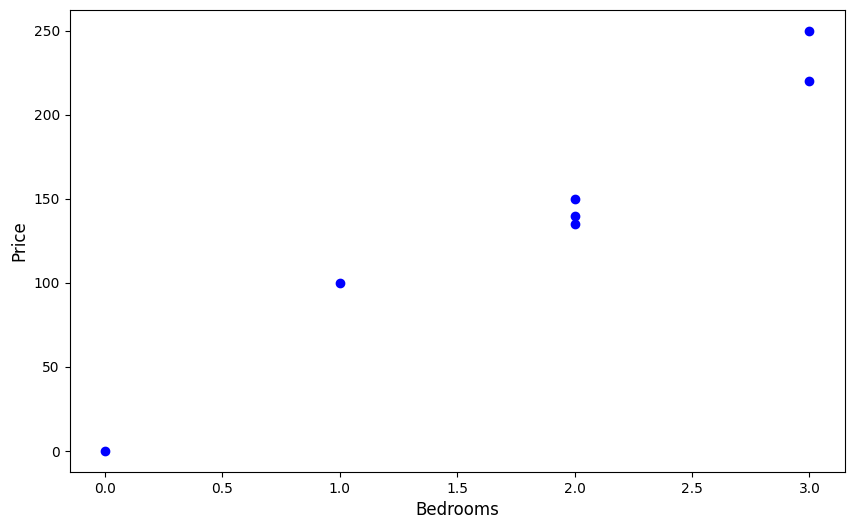

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.scatter(df_copy['Bedrooms'], df_copy['Price'], c="b", marker='o')
plt.xlabel("Bedrooms", fontsize=12)
plt.ylabel("Price", rotation=90, fontsize=12)
plt.show()

## Create a Separate Feature Set (Data Matrix X) and Target (1D Array Y)

Create a data matrix (X) that contains all features and a 1D target array (Y) containing the price.

First, we create separate DataFrame objects for X and Y. Then, we convert the DataFrame objects into NumPy arrays.

In [21]:
Y = df_copy['Price'] # Data frame containing the target 
X = df_copy.drop(columns='Price')  # Data frame containing all features excluding the target

print("Data frame X:")
print(X)
print("\nData frame Y:")
print(Y)

Data frame X:
   Bedrooms  Nearby Schools  Backyard_Yes
0       2.0               0             1
1       3.0               0             1
2       1.0               3             0
3       3.0               3             1
4       2.0               3             1
5       2.0               0             1
6       0.0               1             0

Data frame Y:
0    150.0
1    250.0
2    100.0
3    220.0
4    135.0
5    140.0
6      0.0
Name: Price, dtype: float64


## Convert X & Y into Arrays

Use the NumPy asarray() method to convert the Pandas data frame objects X and y into numpy arrays.

In [22]:
import numpy as np

X = np.asarray(X) # Data Matrix containing all features excluding the target
X

array([[2., 0., 1.],
       [3., 0., 1.],
       [1., 3., 0.],
       [3., 3., 1.],
       [2., 3., 1.],
       [2., 0., 1.],
       [0., 1., 0.]])

In [23]:
Y = np.asarray(Y) # 1D target array
Y

array([150., 250., 100., 220., 135., 140.,   0.])

## Data Type of X and Y

We can check the data type of X and Y arrays.

For training ML models (in supervised learning), we may need the target data type to be integer. Below we show how to convert the target data type to "int".

In [24]:
print("X Data Type: ", X.dtype)
print("Y Data Type: ", Y.dtype)

Y = Y.astype(int)
print("\nY Data Type (after conversion to int): ", Y.dtype)

X Data Type:  float64
Y Data Type:  float64

Y Data Type (after conversion to int):  int64
